In [34]:
!pip install scikit-image


In [35]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu, threshold_sauvola
from sklearn.metrics import jaccard_score


In [36]:
DATA_PATH = "/kaggle/input/brain-tumor-segmentation"

images_path = os.path.join(DATA_PATH, "images")
masks_path = os.path.join(DATA_PATH, "masks")

image_list = sorted(os.listdir(images_path))
mask_list = sorted(os.listdir(masks_path))

print("Total Images:", len(image_list))


Total Images: 3064


In [37]:
def dice_score(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-8)


In [38]:
idx = 0  # change index to test different images

image = cv2.imread(os.path.join(images_path, image_list[idx]), 0)
mask = cv2.imread(os.path.join(masks_path, mask_list[idx]), 0)

mask = mask / 255


In [39]:
# Otsu threshold
thresh_otsu = threshold_otsu(image)
otsu_seg = image > thresh_otsu

otsu_seg = otsu_seg.astype(np.uint8)


In [40]:
window_size = 25

thresh_sauvola = threshold_sauvola(image, window_size=window_size)
sauvola_seg = image > thresh_sauvola

sauvola_seg = sauvola_seg.astype(np.uint8)


In [41]:
# Dice
dice_otsu = dice_score(mask, otsu_seg)
dice_sauvola = dice_score(mask, sauvola_seg)

# Jaccard
jacc_otsu = jaccard_score(mask.flatten(), otsu_seg.flatten())
jacc_sauvola = jaccard_score(mask.flatten(), sauvola_seg.flatten())

print("Otsu -> Dice:", dice_otsu, " Jaccard:", jacc_otsu)
print("Sauvola -> Dice:", dice_sauvola, " Jaccard:", jacc_sauvola)


Otsu -> Dice: 0.10385927701953801  Jaccard: 0.05477403431128187
Sauvola -> Dice: 0.0627140395262668  Jaccard: 0.03237211274216627


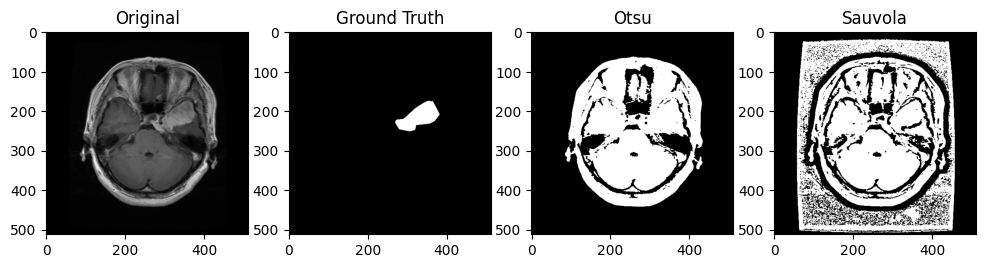

In [42]:
plt.figure(figsize=(12,8))

plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1,4,2)
plt.title("Ground Truth")
plt.imshow(mask, cmap='gray')

plt.subplot(1,4,3)
plt.title("Otsu")
plt.imshow(otsu_seg, cmap='gray')

plt.subplot(1,4,4)
plt.title("Sauvola")
plt.imshow(sauvola_seg, cmap='gray')

plt.show()
